## Python Question A - ImageDataGenerator

## Import Necessary Libraries

In [158]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import zipfile
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow_datasets import ImageFolder
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


## Download *Cars* Image Dataset

In [159]:
!wget --no-check-certificate \
    https://app.box.com/shared/static/bgjqppjtnbc8e7258rbnq0ch7fy27tp6.zip \
    -O /tmp/cars.zip

--2022-11-16 21:26:09--  https://app.box.com/shared/static/bgjqppjtnbc8e7258rbnq0ch7fy27tp6.zip
Resolving app.box.com (app.box.com)... 74.112.186.144
Connecting to app.box.com (app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/bgjqppjtnbc8e7258rbnq0ch7fy27tp6.zip [following]
--2022-11-16 21:26:10--  https://app.box.com/public/static/bgjqppjtnbc8e7258rbnq0ch7fy27tp6.zip
Reusing existing connection to app.box.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud.com/d/1/b1!Dl2fFvyjPNz7Ocx6wkXnMFsgp8z-syEd9mEOdHKZ2KZUJ4NavvVicF3ZDLxiEmZ8qccqBsSx47lZdY0K8yFJTu26txppby4Ao3drJbHiLNeIFT1m3KTcqHaFQTLfPjqoKYfc1SM35e9fpD4-dmgCu2OHqTUzA0U_g1lsLNVQtUX9i8JdCFWhTMk6DF-56zSGfH8MejalP5rMVonRSXZLuBAFyk3mdMRG8Gzzdr0cjfgrjDT_H2YAhJjTnL2QbEzXWDGmpcTjmYU7lN60RHZ2dOTQZpKYwL6jM_PF_Tm3Xmo0rcWqs1wEmJPcofoS6mpzCAsg-zcA-_g7I9KwfENNWpbZ10fvLrixXY2WbLedz0-0RokoP5hUzKhR6oqsl5e5kU-A6xnQSEPBWhCaWheX

In [160]:
local_zip = '/tmp/cars.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [161]:
base_path = '/tmp/cars'
train_path = os.path.join(base_path, 'train')
valid_path = os.path.join(base_path, 'valid')
test_path = os.path.join(base_path, 'test')

In [162]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, vertical_flip = True,
    horizontal_flip = True, rotation_range = 90) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['BMW', 'Bugatti', 'Lamborghini', 'McLaren', 'Volkswagen'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['BMW', 'Bugatti', 'Lamborghini', 'McLaren', 'Volkswagen'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['BMW', 'Bugatti', 'Lamborghini', 'McLaren', 'Volkswagen'], batch_size=10, shuffle=False)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [163]:
imgs, labels = next(train_batches)

In [164]:
# This function will plot images in the form of a grid with 1 row and 10 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

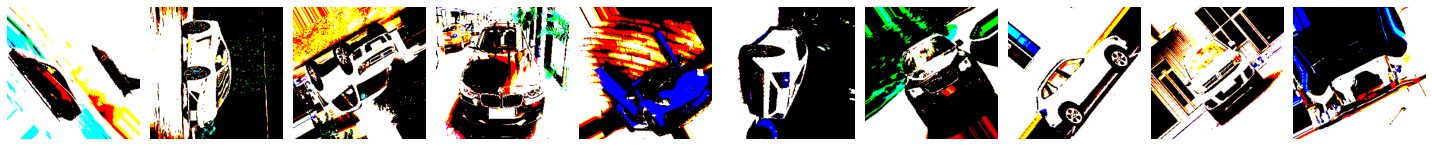

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [165]:
plotImages(imgs)
print(labels)

## Python Question B

---



In [166]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [167]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [168]:
model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [169]:
for layer in model.layers[:-2]:
    layer.trainable = False

In [170]:
model.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [171]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Python Question C

---



## Train the fine-tuned VGG16 model (Neural Network)

In [172]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
40/40 - 10s - loss: 1.5308 - accuracy: 0.5250 - val_loss: 1.2232 - val_accuracy: 0.5400 - 10s/epoch - 243ms/step
Epoch 2/20
40/40 - 10s - loss: 0.8761 - accuracy: 0.7075 - val_loss: 0.6022 - val_accuracy: 0.7700 - 10s/epoch - 241ms/step
Epoch 3/20
40/40 - 9s - loss: 0.5302 - accuracy: 0.8050 - val_loss: 0.5734 - val_accuracy: 0.8100 - 9s/epoch - 217ms/step
Epoch 4/20
40/40 - 9s - loss: 0.4952 - accuracy: 0.8225 - val_loss: 0.6443 - val_accuracy: 0.7600 - 9s/epoch - 219ms/step
Epoch 5/20
40/40 - 9s - loss: 0.4203 - accuracy: 0.8650 - val_loss: 0.4069 - val_accuracy: 0.7900 - 9s/epoch - 218ms/step
Epoch 6/20
40/40 - 10s - loss: 0.2735 - accuracy: 0.9075 - val_loss: 0.6610 - val_accuracy: 0.7900 - 10s/epoch - 248ms/step
Epoch 7/20
40/40 - 9s - loss: 0.3079 - accuracy: 0.9075 - val_loss: 2.0405 - val_accuracy: 0.7000 - 9s/epoch - 223ms/step
Epoch 8/20
40/40 - 9s - loss: 0.3503 - accuracy: 0.8850 - val_loss: 1.3455 - val_accuracy: 0.6800 - 9s/epoch - 215ms/step
Epoch 9/20
40/40 -

## Evaluate model prediction

In [173]:
y_test = test_batches.classes
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [174]:
output_layer = model.predict(x=test_batches, verbose=0)
np.round(output_layer)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [175]:
y_pred = np.argmax(output_layer, axis=-1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 3 1 3 3 1 1 3 1 3 3 3 3 3 3
 3 1 2 3 3 3 4 4 4 4 4 4 4 4 4 4 0 0 0 4 0 0 0 0 4 4]


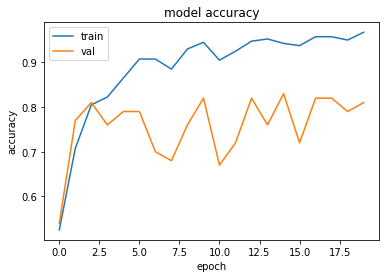

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

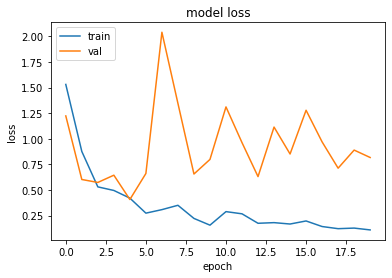

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

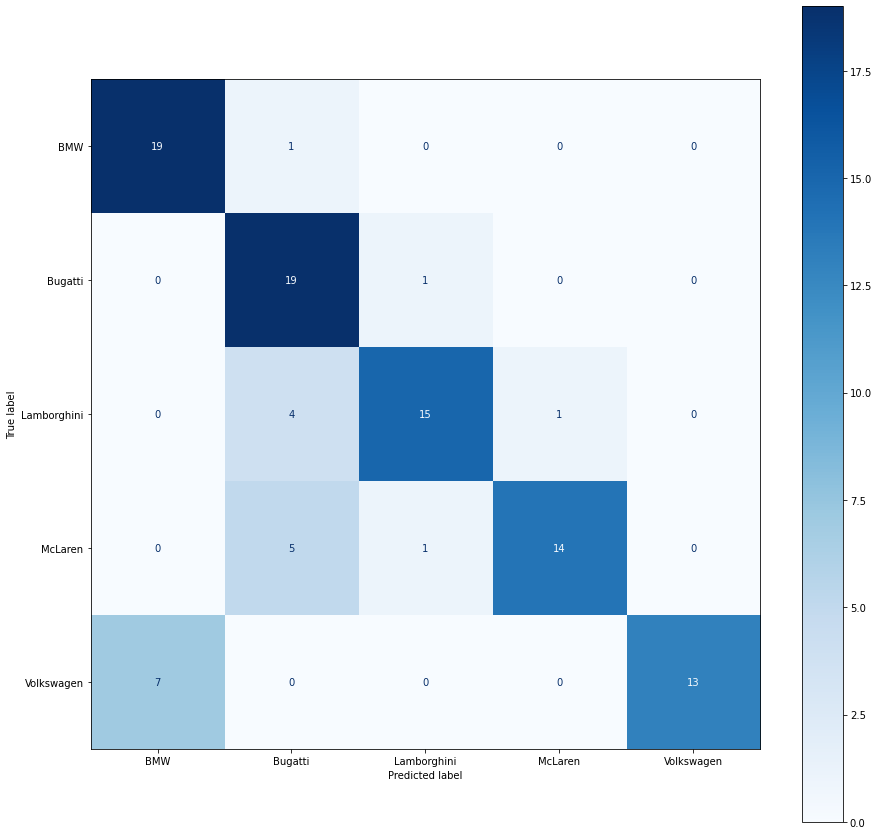

In [178]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BMW', 'Bugatti', 'Lamborghini', 'McLaren', 'Volkswagen'])

disp.plot(cmap=plt.cm.Blues)
fig = disp.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

In [179]:
def display_results(y_true, y_pred, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_pred),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    #results.sort_values(by='F-Score', ascending=False, inplace=True)                           
    return results

In [144]:
# Accuracy Score
finetuneaccuracy = accuracy_score(y_test, y_pred)

result_1 = display_results(y_test, y_pred, train_batches.class_indices.keys())
print("Fine-Tuned VGG16 Model Accuracy: {:.2f}%".format(finetuneaccuracy * 100))
result_1

Fine-Tuned VGG16 Model Accuracy: 74.00%


,Precision,Recall,F-Score,Support
BMW,0.700000,0.70,0.700000,20.0
Bugatti,0.800000,0.80,0.800000,20.0
Lamborghini,0.650000,0.65,0.650000,20.0
McLaren,0.833333,0.75,0.789474,20.0
Volkswagen,0.727273,0.80,0.761905,20.0


## Python Question E

In [191]:
modelv2 = Sequential()
for layer in vgg16_model.layers[:-2]:
    modelv2.add(layer)

modelv2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [192]:
for layer in modelv2.layers[:-1]:
    layer.trainable = False

modelv2.add(Dropout(0.2))
modelv2.add(Dense(units=5, activation='softmax'))
modelv2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [193]:
modelv2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [194]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [195]:
history2 = modelv2.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose=2, callbacks=early_stop)

Epoch 1/50
40/40 - 10s - loss: 7.0534 - accuracy: 0.5575 - val_loss: 3.6231 - val_accuracy: 0.7700 - 10s/epoch - 249ms/step
Epoch 2/50
40/40 - 9s - loss: 2.4189 - accuracy: 0.8275 - val_loss: 6.4397 - val_accuracy: 0.6500 - 9s/epoch - 215ms/step
Epoch 3/50
40/40 - 9s - loss: 1.1581 - accuracy: 0.8900 - val_loss: 7.1885 - val_accuracy: 0.6800 - 9s/epoch - 213ms/step
Epoch 4/50
40/40 - 10s - loss: 1.2544 - accuracy: 0.8825 - val_loss: 3.3500 - val_accuracy: 0.7900 - 10s/epoch - 241ms/step
Epoch 5/50
40/40 - 9s - loss: 1.0221 - accuracy: 0.9050 - val_loss: 3.8456 - val_accuracy: 0.7800 - 9s/epoch - 216ms/step
Epoch 6/50
40/40 - 10s - loss: 1.0134 - accuracy: 0.9150 - val_loss: 3.0216 - val_accuracy: 0.8200 - 10s/epoch - 244ms/step
Epoch 7/50
40/40 - 9s - loss: 0.9519 - accuracy: 0.9350 - val_loss: 3.7248 - val_accuracy: 0.8400 - 9s/epoch - 213ms/step
Epoch 8/50
40/40 - 9s - loss: 1.0977 - accuracy: 0.9325 - val_loss: 3.6830 - val_accuracy: 0.8300 - 9s/epoch - 214ms/step
Epoch 9/50
40/40 -

In [196]:
output_layerv2 = modelv2.predict(x=test_batches, verbose=0)
np.round(output_layerv2)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [197]:
y_predv2 = np.argmax(output_layerv2, axis=-1)
print(y_predv2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 1 3 2 1 1 1 1 3 2 1 1 1 1 3 3 1
 3 1 1 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 0 0 0 4 4 0 4 4 4 4]


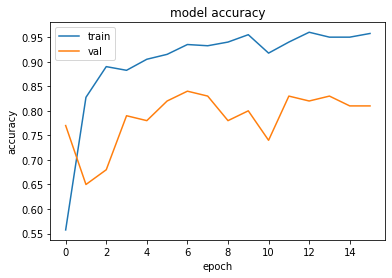

In [198]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

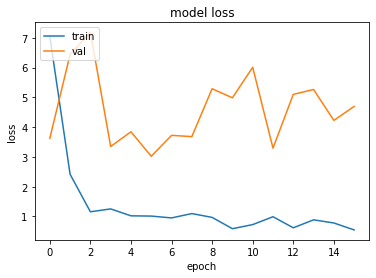

In [199]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

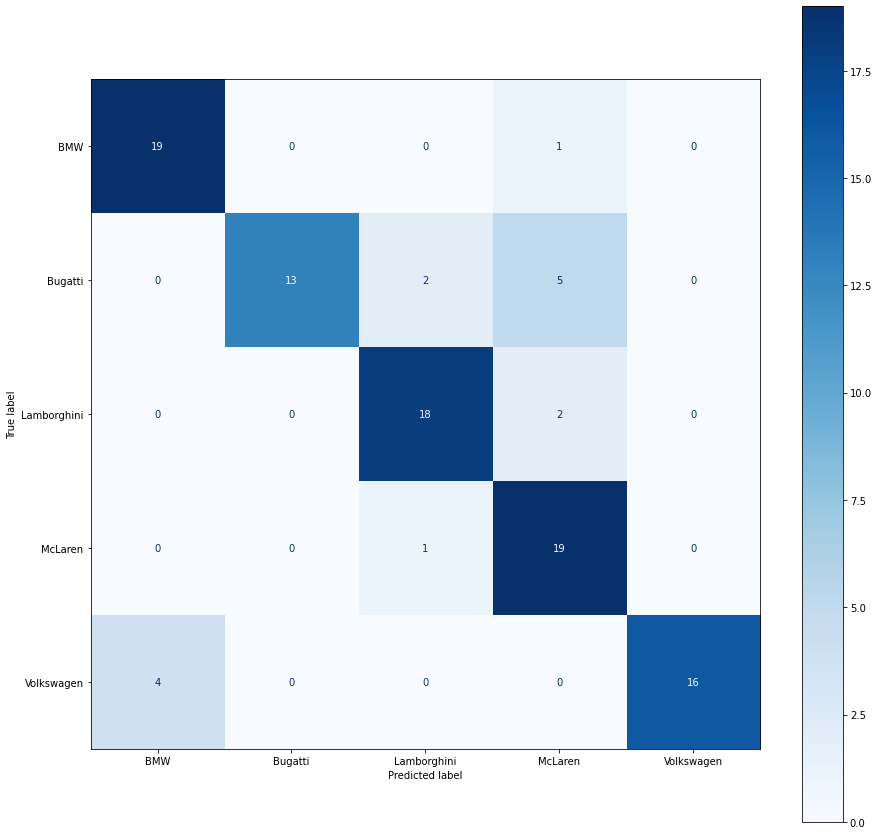

In [200]:
cm = confusion_matrix(y_test, y_predv2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BMW', 'Bugatti', 'Lamborghini', 'McLaren', 'Volkswagen'])

disp.plot(cmap=plt.cm.Blues)
fig = disp.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

In [201]:
# Accuracy Score
finetuneaccuracyv2 = accuracy_score(y_test, y_predv2)

result_2 = display_results(y_test, y_predv2, train_batches.class_indices.keys())
print("Fine-Tuned VGG16 Model with Further Customized Fine Tuning: {:.2f}%".format(finetuneaccuracyv2 * 100))
result_2

Fine-Tuned VGG16 Model with Further Customized Fine Tuning: 85.00%


,Precision,Recall,F-Score,Support
BMW,0.826087,0.95,0.883721,20.0
Bugatti,1.000000,0.65,0.787879,20.0
Lamborghini,0.857143,0.90,0.878049,20.0
McLaren,0.703704,0.95,0.808511,20.0
Volkswagen,1.000000,0.80,0.888889,20.0
